<a href="https://colab.research.google.com/github/Bprafull/Bprafull/blob/main/2_Python_backtest_for_3_swing_strategies_3%E2%80%934_week_horizon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batches:   0%|          | 0/13 [00:00<?, ?it/s]ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['PURPLEUTED.NS', 'DRSCARGO.NS', 'SHTR.NS', 'FICRF3GP.NS']: YFTzMissingError('possibly delisted; no timezone found')
Batches:   8%|▊         | 1/13 [00:11<02:23, 11.96s/it]ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['TECHERA.NS', 'HPTL.NS']: YFTzMissingError('possibly delisted; no timezone found')
Batches:  15%|█▌        | 2/13 [00:23<02:07, 11.62s/it]ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['AIRTELPP.NS', 'FOCE.NS']: YFTzMissingError('possibly delisted; no timezone found')
Batches:  23%|██▎       | 3/13 [00:36<02:03, 12.31s/it]ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ARHAM.NS']: YFTzMissingError('possibly delisted; no timezone found')
Batches:  31%|███       | 4/13 [00:49<01:53, 12.63s/it]ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['MACOBSTECH.NS', 'SSEGL.NS', 'KAMI.NS']: YFTzMissingError('possibly delisted; no timezone found')
Batches:  38%|███▊     

Summary (first rows):
    N  WinRate  AvgGain  AvgLoss  Expectancy  MedianRet          Strategy  \
0  35    20.00    10.65    -5.22       -2.05      -4.03  BreakoutPullback   
1   3    33.33     1.48    -4.62       -2.59      -4.54    MeanRevUptrend   
2  66    40.91     6.46    -3.39        0.64      -0.25        RSRotation   
3  28    21.43     9.34    -5.28       -2.15      -4.26  BreakoutPullback   
4   2   100.00     1.07     0.00        1.07       1.07    MeanRevUptrend   

          Ticker  
0   BGRENERGY.NS  
1   BGRENERGY.NS  
2   BGRENERGY.NS  
3  MCLEODRUSS.NS  
4  MCLEODRUSS.NS  

Strategy-level averages across universe:
                          N    WinRate    AvgGain   AvgLoss  Expectancy  \
Strategy                                                                  
BreakoutPullback  18.725552  36.841672  11.743691 -3.974890    1.421609   
MeanRevUptrend     1.782334  41.753123   1.616341 -1.069590    0.437035   
RSRotation        36.498423  37.449527   6.332208 -3.007508

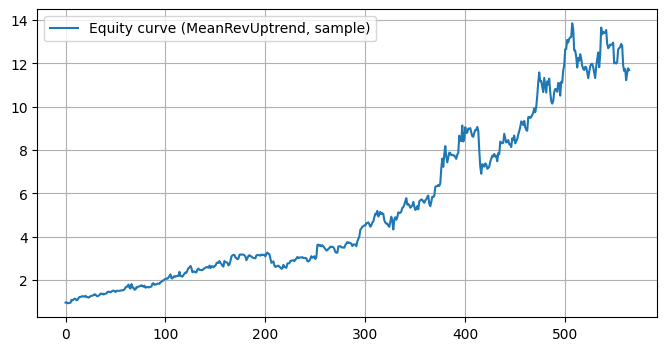


Strategy-level averages across universe:
                          N    WinRate    AvgGain   AvgLoss  Expectancy  \
Strategy                                                                  
BreakoutPullback  18.725552  36.841672  11.743691 -3.974890    1.421609   
MeanRevUptrend     1.782334  41.753123   1.616341 -1.069590    0.437035   
RSRotation        36.498423  37.449527   6.332208 -3.007508    0.575047   

                  MedianRet  
Strategy                     
BreakoutPullback  -1.282681  
MeanRevUptrend     0.414132  
RSRotation        -0.688265  

Best overall strategy by expectancy: BreakoutPullback
Strategy with highest win rate: MeanRevUptrend

Best strategy per ticker (first few rows):
            Ticker          Strategy  WinRate  Expectancy
39       360ONE.NS  BreakoutPullback    40.00        0.02
907     63MOONS.NS    MeanRevUptrend   100.00       10.04
499  AARTIPHARM.NS    MeanRevUptrend     0.00        0.00
543         ABB.NS  BreakoutPullback    31.82        0

In [1]:
# ===== Setup =====
!pip install yfinance pandas numpy tqdm matplotlib pyarrow

import yfinance as yf
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ===== Config =====
START_DATE = "2010-01-01"    # history start
END_DATE = None              # defaults to today
BATCH_SIZE = 75              # 50–100 is safe
HOLD_DAYS = 20               # ~4 weeks
LIQ_MIN_SHARES = 50000       # minimum median daily volume filter
LIQ_MIN_VALUE_CR = 1.0       # median daily turnover in crore INR (approx)
INR_PER_UNIT = 1.0           # adjust if you prefer exact turnover calc via price*volume/1e7

# ===== Your tickers (paste full list) =====
tickers_all = [
    "HYBRIDFIN.NS" ,"BGRENERGY.NS" ,"STALLION.NS" ,"INDOTHAI.NS" ,"GMBREW.NS" ,"MCLEODRUSS.NS" ,"VISASTEEL.NS" ,"TAC.NS" ,"MANAV.NS" ,"SPCENET.NS" ,"SOMATEX.NS" ,"SIKKO.NS" ,"LATTEYS.NS" ,"DRSCARGO.NS" ,"VMARCIND.NS" ,"MAHASTEEL.NS" ,"SHTR.NS" ,"TIRUPATI.NS" ,"SANDUMA.NS" ,"MASKINVEST.NS" ,"SAMBHAAV.NS" ,"ATHERENERG.NS" ,"TICL.NS" ,"ZENITHSTL.NS" ,"TARAPUR.NS" ,"JINDALPHOT.NS" ,"SOUTHBANK.NS" ,"ACUTAAS.NS" ,"SKYGOLD.NS" ,"ATLANTAA.NS" ,"ARIHANTACA.NS" ,"BHARATSE.NS" ,"INDRAMEDCO.NS" ,"IIFLCAPS.NS" ,"INOXGREEN.NS" ,"MAANALU.NS" ,"POCL.NS" ,"CEATLTD.NS" ,"FICRF3GP.NS" ,"TARACHAND.NS" ,"ASCOM.NS" ,"PURPLEUTED.NS" ,"KERNEX.NS" ,"BSE.NS" ,"AVALON.NS" ,"MINDTECK.NS" ,"CENTEXT.NS" ,"ORIANA.NS" ,"TSFINV.NS" ,"ANIKINDS.NS" ,"PROZONER.NS" ,"V2RETAIL.NS" ,"MVKAGRO.NS" ,"INDIAGLYCO.NS" ,"MRPL.NS" ,"FEDERALBNK.NS" ,"360ONE.NS" ,"PERSISTENT.NS" ,"DESTINY.NS" ,"SAMPANN.NS" ,"NEULANDLAB.NS" ,"TVSHLTD.NS" ,"KARURVYSYA.NS" ,"TREJHARA.NS" ,"FORTIS.NS" ,"ANGELONE.NS" ,"ASLIND.NS" ,"CUPID.NS" ,"JKTYRE.NS" ,"DYNAMATECH.NS" ,"MANAKCOAT.NS" ,"ADANIPOWER.NS" ,"GRCL.NS" ,"SALSTEEL.NS" ,"HERCULES.NS" ,"MCX.NS" ,"SMSPHARMA.NS" ,"MOLDTECH.NS" ,"INDIANB.NS" ,"GILLANDERS.NS" ,"ORBTEXP.NS" ,"ASTERDM.NS" ,"KICL.NS" ,"TECHERA.NS" ,"NUVAMA.NS" ,"SEJALLTD.NS" ,"SHRIRAMFIN.NS" ,"ETHOSLTD.NS" ,"PRECWIRE.NS" ,"WELINV.NS" ,"AAREYDRUGS.NS" ,"SWARAJ.NS" ,"PRESTIGE.NS" ,"BSL.NS" ,"PGEL.NS" ,"CIGNITITEC.NS" ,"LEMERITE.NS" ,"KALYANIFRG.NS" ,"HCG.NS" ,"VASCONEQ.NS" ,"LTF.NS" ,"POLYSIL.NS" ,"NAGREEKCAP.NS" ,"RAMKY.NS" ,"HBLENGINE.NS" ,"RADICO.NS" ,"ESILVER.NS" ,"BLACKBUCK.NS" ,"ATALREAL.NS" ,"TDPOWERSYS.NS" ,"NATIONALUM.NS" ,"NSIL.NS" ,"MBAPL.NS" ,"GLOBALVECT.NS" ,"SILINV.NS" ,"QGOLDHALF.NS" ,"GOLD1.NS" ,"GOLDSHARE.NS" ,"MOTILALOFS.NS" ,"HDFCGOLD.NS" ,"RELIABLE.NS" ,"SETFGOLD.NS" ,"ANANDRATHI.NS" ,"SILVERBEES.NS" ,"PARAGMILK.NS" ,"GOLDETF.NS" ,"GOLDETFADD.NS" ,"BSLGOLDETF.NS" ,"IVZINGOLD.NS" ,"AXISGOLD.NS" ,"GOLDBEES.NS" ,"BANKINDIA.NS" ,"HPTL.NS" ,"MON100.NS" ,"AXISILVER.NS" ,"SILVERIETF.NS" ,"GOLDIETF.NS" ,"NAM-INDIA.NS" ,"INM.NS" ,"SOMICONVEY.NS" ,"KPIGREEN.NS" ,"GICL.NS" ,"PRAMARA.NS" ,"JAINAM.NS" ,"SILVER1.NS" ,"ORISSAMINE.NS" ,"SILVER.NS" ,"HDFCSILVER.NS" ,"HINDCOPPER.NS" ,"SILVERADD.NS" ,"INDNIPPON.NS" ,"SIGMA.NS" ,"SILVERAG.NS" ,"MAHABANK.NS" ,"PTCIL.NS" ,"SKMEGGPROD.NS" ,"WELENT.NS" ,"TI.NS" ,"BHARATWIRE.NS" ,"KRISHANA.NS" ,"ITI.NS" ,"CADSYS.NS" ,"MUTHOOTFIN.NS" ,"PILANIINVS.NS" ,"REGENCERAM.NS" ,"HITECHGEAR.NS" ,"PNB.NS" ,"CESC.NS" ,"ABCAPITAL.NS" ,"GLFL.NS" ,"ZOTA.NS" ,"BANKBARODA.NS" ,"CDSL.NS" ,"TEMBO.NS" ,"MOS.NS" ,"MRF.NS" ,"KEYFINSERV.NS" ,"AILIMITED.NS" ,"KALYANKJIL.NS" ,"UCOBANK.NS" ,"GOKEX.NS" ,"AIRTELPP.NS" ,"JPOLYINVST.NS" ,"GENESYS.NS" ,"HINDZINC.NS" ,"KILITCH.NS" ,"VIVIANA.NS" ,"BMETRICS.NS" ,"BRIGADE.NS" ,"PSUBNKIETF.NS" ,"CANBK.NS" ,"PSUBNKBEES.NS" ,"PASHUPATI.NS" ,"SUMMITSEC.NS" ,"BBOX.NS" ,"GICRE.NS" ,"NBCC.NS" ,"PSUBANK.NS" ,"MARATHON.NS" ,"MAXHEALTH.NS" ,"DSSL.NS" ,"BHARTIHEXA.NS" ,"EFACTOR.NS" ,"AGIIL.NS" ,"PHOENIXLTD.NS" ,"AAATECH.NS" ,"CCCL.NS" ,"MARKSANS.NS" ,"SHAILY.NS" ,"PANACEABIO.NS" ,"DCMSRIND.NS" ,"ANNAPURNA.NS" ,"ESSARSHPNG.NS" ,"HINDPETRO.NS" ,"J&KBANK.NS" ,"AEGISLOG.NS" ,"SALZERELEC.NS" ,"BHARTIARTL.NS" ,"TVSMOTOR.NS" ,"SBC.NS" ,"PARIN.NS" ,"JYOTICNC.NS" ,"VASWANI.NS" ,"INOXWIND.NS" ,"FOCE.NS" ,"GLOBALPET.NS" ,"INDIGO.NS" ,"KINGFA.NS" ,"AIIL.NS" ,"KHAICHEM.NS" ,"CHOLAFIN.NS" ,"MEDANTA.NS" ,"JAYNECOIND.NS" ,"ASIANHOTNR.NS" ,"SUNPHARMA.NS" ,"JMFINANCIL.NS" ,"LINC.NS" ,"TCPLPACK.NS" ,"IOC.NS" ,"AURUM.NS" ,"ASTRAZEN.NS" ,"KRISHIVAL.NS" ,"LLOYDSME.NS" ,"ARIHANTSUP.NS" ,"M&M.NS" ,"NARMADA.NS" ,"APS.NS" ,"SVLL.NS" ,"MARINE.NS" ,"EMKAY.NS" ,"HEROMOTOCO.NS" ,"MODTHREAD.NS" ,"KSL.NS" ,"VEDL.NS" ,"TORNTPOWER.NS" ,"HUBTOWN.NS" ,"ASTRAMICRO.NS" ,"APOLLOTYRE.NS" ,"VEEKAYEM.NS" ,"WSI.NS" ,"MIDCAP.NS" ,"LUMAXIND.NS" ,"POONAWALLA.NS" ,"GKWLIMITED.NS" ,"NETWEB.NS" ,"TIMETECHNO.NS" ,"UNIONBANK.NS" ,"SJS.NS" ,"ADANIPORTS.NS" ,"GMRAIRPORT.NS" ,"APLAPOLLO.NS" ,"ETERNAL.NS" ,"YATHARTH.NS" ,"VR.NS" ,"IFCI.NS" ,"SLONE.NS" ,"MOVALUE.NS" ,"BEL.NS" ,"AZAD.NS" ,"ONEPOINT.NS" ,"MPSLTD.NS" ,"MWL.NS" ,"AIMTRON.NS" ,"ARHAM.NS" ,"WINDMACHIN.NS" ,"GOODLUCK.NS" ,"LLOYDS.NS" ,"BAJAJ-AUTO.NS" ,"MAZDA.NS" ,"POLYCAB.NS" ,"DATAPATTNS.NS" ,"SUPREMEPWR.NS" ,"KTKBANK.NS" ,"IREDA.NS" ,"MOIL.NS" ,"KECL.NS" ,"INDHOTEL.NS" ,"KFINTECH.NS" ,"BHAGYANGR.NS" ,"KSOLVES.NS" ,"GABRIEL.NS" ,"MANORAMA.NS" ,"PGIL.NS" ,"ARTEMISMED.NS" ,"MIDCAPETF.NS" ,"BLUESTARCO.NS" ,"ESCORTS.NS" ,"SSEGL.NS" ,"PREMEXPLN.NS" ,"TECHNOE.NS" ,"HECPROJECT.NS" ,"RPGLIFE.NS" ,"ICICIB22.NS" ,"ATULAUTO.NS" ,"PRUDENT.NS" ,"HUDCO.NS" ,"GRWRHITECH.NS" ,"DHANBANK.NS" ,"LODHA.NS" ,"RCF.NS" ,"GESHIP.NS" ,"LT.NS" ,"VSSL.NS" ,"STARCEMENT.NS" ,"ECLERX.NS" ,"GAIL.NS" ,"OLIL.NS" ,"GODFRYPHLP.NS" ,"SHAHALLOYS.NS" ,"LOKESHMACH.NS" ,"CELLECOR.NS" ,"STEELCAS.NS" ,"NHPC.NS" ,"AKIKO.NS" ,"GMRP&UI.NS" ,"PDMJEPAPER.NS" ,"IITL.NS" ,"BEML.NS" ,"PURVA.NS" ,"MACOBSTECH.NS" ,"HBSL.NS" ,"CYBERMEDIA.NS" ,"EIMCOELECO.NS" ,"MASON.NS" ,"TERASOFT.NS" ,"NCC.NS" ,"EMUDHRA.NS" ,"NILASPACES.NS" ,"ACE.NS" ,"WEALTH.NS" ,"BAHETI.NS" ,"ZYDUSLIFE.NS" ,"BOSCHLTD.NS" ,"TALBROAUTO.NS" ,"GLAXO.NS" ,"THOMASCOOK.NS" ,"AUTOIETF.NS" ,"TRENT.NS" ,"IRISDOREME.NS" ,"AUTOBEES.NS" ,"HAL.NS" ,"VBL.NS" ,"ADSL.NS" ,"IRFC.NS" ,"EXIDEIND.NS" ,"GANECOS.NS" ,"EIHOTEL.NS" ,"INNOVANA.NS" ,"REMSONSIND.NS" ,"SYSTANGO.NS" ,"KAMI.NS" ,"KAMDHENU.NS" ,"AJMERA.NS" ,"DHUNINV.NS" ,"APARINDS.NS" ,"BDL.NS" ,"CPSEETF.NS" ,"BECTORFOOD.NS" ,"KEI.NS" ,"SAKAR.NS" ,"URAVIDEF.NS" ,"SOLARINDS.NS" ,"TIRUPATIFL.NS" ,"ANUP.NS" ,"VOLTAMP.NS" ,"ASAHIINDIA.NS" ,"OILCOUNTUB.NS" ,"BLKASHYAP.NS" ,"RKFORGE.NS" ,"NH.NS" ,"JYOTHYLAB.NS" ,"POWERGRID.NS" ,"ASIANENE.NS" ,"MANGCHEFER.NS" ,"TIIL.NS" ,"EIHAHOTELS.NS" ,"PANACHE.NS" ,"CHENNPETRO.NS" ,"GANESHHOU.NS" ,"RECLTD.NS" ,"VISAMAN.NS" ,"ITC.NS" ,"WINDLAS.NS" ,"SIRCA.NS" ,"SHYAMMETL.NS" ,"TBZ.NS" ,"ARROWGREEN.NS" ,"GRPLTD.NS" ,"GVT&D.NS" ,"AARTIPHARM.NS" ,"KPIL.NS" ,"FLUOROCHEM.NS" ,"SIGNATURE.NS" ,"OBSCP.NS" ,"HDFCAMC.NS" ,"CHOICEIN.NS" ,"HSCL.NS" ,"JPPOWER.NS" ,"LTFOODS.NS" ,"SIDDHIKA.NS" ,"PENINLAND.NS" ,"URBAN.NS" ,"KARNIKA.NS" ,"CUMMINSIND.NS" ,"MBLINFRA.NS" ,"STYRENIX.NS" ,"ENSER.NS" ,"SHARDAMOTR.NS" ,"PRIMESECU.NS" ,"SHRIPISTON.NS" ,"JKCEMENT.NS" ,"JBCHEPHARM.NS" ,"LUPIN.NS" ,"FIEMIND.NS" ,"ASHAPURMIN.NS" ,"NTPC.NS" ,"BHEL.NS" ,"ENGINERSIN.NS" ,"ABB.NS" ,"USHAMART.NS" ,"NPST.NS" ,"ERIS.NS" ,"JAGSNPHARM.NS" ,"MINDACORP.NS" ,"KIRLOSBROS.NS" ,"VOLERCAR.NS" ,"AMBER.NS" ,"SHIVAUM.NS" ,"KHAITANLTD.NS" ,"CARERATING.NS" ,"GRSE.NS" ,"SKP.NS" ,"LLOYDSENGG.NS" ,"FORCEMOT.NS" ,"RSYSTEMS.NS" ,"REDINGTON.NS" ,"MARUTI.NS" ,"OFSS.NS" ,"AURIONPRO.NS" ,"VARROC.NS" ,"BAGFILMS.NS" ,"NAVKARCORP.NS" ,"KSCL.NS" ,"CHOLAHLDNG.NS" ,"SOBHA.NS" ,"BBTCL.NS" ,"GIPCL.NS" ,"WENDT.NS" ,"UNITECH.NS" ,"TRITURBINE.NS" ,"DOLPHIN.NS" ,"HCC.NS" ,"TITAGARH.NS" ,"ELECTCAST.NS" ,"ARVIND.NS" ,"AVPINFRA.NS" ,"SURANAT&P.NS" ,"COALINDIA.NS" ,"MASTER.NS" ,"NDGL.NS" ,"MAZDOCK.NS" ,"NMDC.NS" ,"SCI.NS" ,"SGIL.NS" ,"BIKAJI.NS" ,"GAYAHWS.NS" ,"MACPOWER.NS" ,"TCI.NS" ,"TORNTPHARM.NS" ,"JGCHEM.NS" ,"DATAMATICS.NS" ,"LEMONTREE.NS" ,"IRCON.NS" ,"RML.NS" ,"WOCKPHARMA.NS" ,"PFC.NS" ,"COMMITTED.NS" ,"CGPOWER.NS" ,"DYCL.NS" ,"GRAVITA.NS" ,"VISHNU.NS" ,"JKIL.NS" ,"SIEMENS.NS" ,"UPLPP1.NS" ,"BURNPUR.NS" ,"JETKNIT.NS" ,"MINDPOOL.NS" ,"VISESHINFO.NS" ,"ARSSINFRA.NS" ,"NTL.NS" ,"TECHIN.NS" ,"SPENTEX.NS" ,"AVSL.NS" ,"EC6RG.NS" ,"AURUMPP.NS" ,"UNIVAFOODS.NS" ,"GFSTEELS.NS" ,"REXPIPES.NS" ,"ARCHIDPLY.NS" ,"MPTODAY.NS" ,"MAXIND.NS" ,"ABINFRA.NS" ,"ESABINDIA.NS" ,"SUNFLAG.NS" ,"TIINDIA.NS" ,"BETA.NS" ,"BHAGCHEM.NS" ,"SKIPPER.NS" ,"RITES.NS" ,"STAR.NS" ,"EUROBOND.NS" ,"DEVIT.NS" ,"RHL.NS" ,"ZAGGLE.NS" ,"NINSYS.NS" ,"INDOTECH.NS" ,"SHREERAMA.NS" ,"DODLA.NS" ,"TFCILTD.NS" ,"EIDPARRY.NS" ,"ARVSMART.NS" ,"OSWALAGRO.NS" ,"BEDMUTHA.NS" ,"KAMATHOTEL.NS" ,"SHANTIGEAR.NS" ,"CHALET.NS" ,"CEMPRO.NS" ,"EMKAYTOOLS.NS" ,"WEL.NS" ,"EICHERMOT.NS" ,"PRICOLLTD.NS" ,"RSSOFTWARE.NS" ,"KAPSTON.NS" ,"JAIBALAJI.NS" ,"JASH.NS" ,"COROMANDEL.NS" ,"THERMAX.NS" ,"JSL.NS" ,"PCJEWELLER.NS" ,"CMNL.NS" ,"WEBELSOLAR.NS" ,"AVG.NS" ,"MDL.NS" ,"BAJAJHLDNG.NS" ,"SUPREMEINF.NS" ,"SWARAJENG.NS" ,"GULFOILLUB.NS" ,"SANGHVIMOV.NS" ,"OIL.NS" ,"LRRPL.NS" ,"SYNCOMF.NS" ,"TAJGVK.NS" ,"MASPTOP50.NS" ,"GVPTECH.NS" ,"ORICONENT.NS" ,"KIMS.NS" ,"NEWGEN.NS" ,"LOTUSEYE.NS" ,"GSMFOILS.NS" ,"CORDSCABLE.NS" ,"RAMASTEEL.NS" ,"SPAL.NS" ,"NESCO.NS" ,"ELECTHERM.NS" ,"SHAKTIPUMP.NS" ,"DUGLOBAL.NS" ,"NDLVENTURE.NS" ,"SOFTTECH.NS" ,"PENIND.NS" ,"SHARDACROP.NS" ,"GEEKAYWIRE.NS" ,"SUMIT.NS" ,"POWERMECH.NS" ,"KSB.NS" ,"CRAFTSMAN.NS" ,"IONEXCHANG.NS" ,"QPOWER.NS" ,"CAPLIPOINT.NS" ,"SERVOTECH.NS" ,"RPOWER.NS" ,"PARTYCRUS.NS" ,"GREENPOWER.NS" ,"IMAGICAA.NS" ,"TEGA.NS" ,"NIITLTD.NS" ,"KOHINOOR.NS" ,"STEELCITY.NS" ,"MAHSCOOTER.NS" ,"GOLDKART.NS" ,"SRM.NS" ,"RAINBOW.NS" ,"MAFANG.NS" ,"GPIL.NS" ,"LCCINFOTEC.NS" ,"SILVERTUC.NS" ,"ATMASTCO.NS" ,"BTML.NS" ,"MIDHANI.NS" ,"FOCUS.NS" ,"KEEPLEARN.NS" ,"RADAAN.NS" ,"VADILALIND.NS" ,"CREST.NS" ,"UNIVCABLES.NS" ,"VENUSPIPES.NS" ,"GMDCLTD.NS" ,"VINYAS.NS" ,"TIL.NS" ,"FOSECOIND.NS" ,"CHEMBOND.NS" ,"NORBTEAEXP.NS" ,"NITCO.NS" ,"HMT.NS" ,"SJVN.NS" ,"CONTI.NS" ,"MOHITIND.NS" ,"INFINIUM.NS" ,"GENUSPOWER.NS" ,"LFIC.NS" ,"MANINDS.NS" ,"KOTHARIPET.NS" ,"RUCHIRA.NS" ,"RAILTEL.NS" ,"BALUFORGE.NS" ,"CROWN.NS" ,"RAMRAT.NS" ,"HARDWYN.NS" ,"HIGREEN.NS" ,"JINDALSTEL.NS" ,"KIRLOSIND.NS" ,"MAGNUM.NS" ,"KRISHNADEF.NS" ,"PARADEEP.NS" ,"KORE.NS" ,"CLSEL.NS" ,"IRIS.NS" ,"SCHNEIDER.NS" ,"KITEX.NS" ,"THANGAMAYL.NS" ,"MONARCH.NS" ,"ROSSELLIND.NS" ,"RVNL.NS" ,"CUBEXTUB.NS" ,"PAVNAIND.NS" ,"INGERRAND.NS" ,"SDBL.NS" ,"ESSENTIA.NS" ,"TRF.NS" ,"SYRMA.NS" ,"HINDCON.NS" ,"TAINWALCHM.NS" ,"WABAG.NS" ,"MTNL.NS" ,"CCHHL.NS" ,"TEXRAIL.NS" ,"MEGASOFT.NS" ,"ARVEE.NS" ,"BBL.NS" ,"MICEL.NS" ,"THOMASCOTT.NS" ,"UNOMINDA.NS" ,"KCK.NS" ,"MODISONLTD.NS" ,"IMFA.NS" ,"WELCORP.NS" ,"TARIL.NS" ,"HPL.NS" ,"OSELDEVICE.NS" ,"BLS.NS" ,"SCHAEFFLER.NS" ,"MHLXMIRU.NS" ,"KKCL.NS" ,"ZTECH.NS" ,"WIPL.NS" ,"DENTALKART.NS" ,"CENTUM.NS" ,"WINSOME.NS" ,"LINDEINDIA.NS" ,"KIRLOSENG.NS" ,"AHLUCONT.NS" ,"ROHLTD.NS" ,"KANDARP.NS" ,"PRITIKA.NS" ,"GANDHITUBE.NS" ,"AARVI.NS" ,"MSPL.NS" ,"PCBL.NS" ,"CANTABIL.NS" ,"SPECTRUM.NS" ,"RTNPOWER.NS" ,"KRITIKA.NS" ,"HONDAPOWER.NS" ,"GLOBAL.NS" ,"DLINKINDIA.NS" ,"ELECON.NS" ,"ZENITHEXPO.NS" ,"FELIX.NS" ,"UNIVASTU.NS" ,"SHRADHA.NS" ,"SUZLON.NS" ,"ELGIEQUIP.NS" ,"TFL.NS" ,"SAFARI.NS" ,"NDRAUTO.NS" ,"POLYMED.NS" ,"RITCO.NS" ,"COCHINSHIP.NS" ,"KPRMILL.NS" ,"AGROPHOS.NS" ,"JWL.NS" ,"ASHOKLEY.NS" ,"LGBBROSLTD.NS" ,"AURDIS.NS" ,"SONUINFRA.NS" ,"DEEPINDS.NS" ,"MAHSEAMLES.NS" ,"COUNCODOS.NS" ,"NLCINDIA.NS" ,"FIDEL.NS" ,"CHEMFAB.NS" ,"GRETEX.NS" ,"AVONMORE.NS" ,"MADRASFERT.NS" ,"PARACABLES.NS" ,"AGARIND.NS" ,"JBMA.NS" ,"XPROINDIA.NS" ,"DIACABS.NS" ,"SHREEKARNI.NS" ,"RADHIKAJWE.NS" ,"MHHL.NS" ,"MKPL.NS" ,"UWCSL.NS" ,"AARON.NS" ,"CCL.NS" ,"TCIFINANCE.NS" ,"ALLDIGI.NS" ,"CONTROLPR.NS" ,"ORIENTHOT.NS" ,"VESUVIUS.NS" ,"METROBRAND.NS" ,"SHEKHAWATI.NS" ,"PREMIERPOL.NS" ,"NITIRAJ.NS" ,"SIMPLEXINF.NS" ,"RANEHOLDIN.NS" ,"20MICRONS.NS" ,"JSLL.NS" ,"NRBBEARING.NS" ,"KDDL.NS" ,"DPABHUSHAN.NS" ,"KPITTECH.NS" ,"VARDMNPOLY.NS" ,"ZODIAC.NS" ,"JSWHL.NS" ,"RAYMOND.NS" ,"HARIOMPIPE.NS" ,"TEAMGTY.NS" ,"ICEMAKE.NS" ,"AGI.NS" ,"TPHQ.NS" ,"REFEX.NS" ,"PULZ.NS" ,"HIRECT.NS" ,"FACT.NS" ,"VIMTALABS.NS" ,"ATLASCYCLE.NS" ,"GLENMARK.NS" ,"SEMAC.NS" ,"PANSARI.NS" ,"PVP.NS" ,"VISHNUINFR.NS" ,"BOHRAIND.NS" ,"RBMINFRA.NS" ,"HILTON.NS" ,"DENORA.NS" ,"BIRLAMONEY.NS" ,"WONDERLA.NS" ,"ABREL.NS" ,"BSHSL.NS" ,"ANANTRAJ.NS" ,"STEL.NS" ,"KAYNES.NS" ,"AVROIND.NS" ,"CREDITACC.NS" ,"INSPIRISYS.NS" ,"VIPCLOTHNG.NS" ,"PRAKASH.NS" ,"ALPEXSOLAR.NS" ,"NRL.NS" ,"DBCORP.NS" ,"TVSELECT.NS" ,"EXCEL.NS" ,"BIGBLOC.NS" ,"TVVISION.NS" ,"DEEPAKFERT.NS" ,"ARIES.NS" ,"SARDAEN.NS" ,"TATAINVEST.NS" ,"OMFURN.NS" ,"PDUMJEIND.NS" ,"RICOAUTO.NS" ,"WANBURY.NS" ,"GEECEE.NS" ,"OLECTRA.NS" ,"KRITI.NS" ,"SURANI.NS" ,"ABCOTS.NS" ,"KELLTONTEC.NS" ,"DGCONTENT.NS" ,"MADHAVBAUG.NS" ,"PIGL.NS" ,"SWELECTES.NS" ,"PITTIENG.NS" ,"E2E.NS" ,"DBREALTY.NS" ,"RPPINFRA.NS" ,"63MOONS.NS" ,"SAKSOFT.NS" ,"DIXON.NS" ,"BLUECHIP.NS" ,"GALLANTT.NS" ,"AXISCADES.NS" ,"PFOCUS.NS" ,"SUVEN.NS" ,"DCI.NS" ,"ZENTEC.NS" ,"RMDRIP.NS" ,"POWERINDIA.NS" ,"SPMLINFRA.NS" ,"APRAMEYA.NS" ,"ARIHANTCAP.NS" ,"RELINFRA.NS" ,"SWANCORP.NS" ,"SUBROS.NS" ,"LUMAXTECH.NS" ,"A2ZINFRA.NS" ,"JINDALSAW.NS" ,"WALCHANNAG.NS" ,"KARMAENG.NS" ,"SHUBHSHREE.NS" ,"GPTINFRA.NS" ,"TARC.NS" ,"JINDRILL.NS" ,"ZUARIIND.NS" ,"PARASPETRO.NS" ,"MGEL.NS" ,"TECHLABS.NS" ,"UNITEDPOLY.NS" ,"GOLDSTAR.NS" ,"BVCL.NS" ,"KESORAMIND.NS" ,"REMUS.NS" ,"SONAMLTD.NS" ,"KOTYARK.NS" ,"SBCL.NS" ,"SHVB.NS" ,"NACLIND.NS" ,"NAVA.NS" ,"APOLLO.NS" ,"ZUARI.NS" ,"ASAL.NS" ,"KODYTECH.NS" ,"S&SPOWER.NS" ,"SUDARSCHEM.NS" ,"SMLISUZU.NS" ,"OMAXAUTO.NS" ,"INFOLLION.NS" ,"TIPSMUSIC.NS" ,"BILVYAPAR.NS" ,"VGL.NS" ,"BANCOINDIA.NS" ,"BEARDSELL.NS" ,"BCONCEPTS.NS" ,"IL&FSENGG.NS" ,"SABTNL.NS" ,"VAISHALI.NS" ,"BIL.NS" ,"OMINFRAL.NS" ,"COOLCAPS.NS" ,"SAHANA.NS" ,"RAJRILTD.NS" ,"GOKULAGRO.NS" ,"SARVESHWAR.NS" ,"KAVDEFENCE.NS" ,"SOLEX.NS" ,"DYNAMIC.NS" ,"IPSL.NS" ,"KAUSHALYA.NS" ,"PKTEA.NS" ,"BLUECOAST.NS" ,"LGHL.NS" ,"KDL.NS" ,"CURAA.NS" ,"GIRIRAJ.NS" ,"IZMO.NS"
]

# ===== Helpers =====
def load_data_batch(tickers, start=START_DATE, end=END_DATE):
    end = end or pd.Timestamp.today().normalize()
    # auto_adjust=True gives split/dividend-adjusted OHLC
    data = yf.download(tickers, start=start, end=end, auto_adjust=True, progress=False)
    return data  # MultiIndex columns: ('Open', TICKER), etc.

def compute_rsi(series, period=14):
    delta = series.diff()
    up = delta.clip(lower=0); down = -delta.clip(upper=0)
    ma_up = up.ewm(alpha=1/period, adjust=False).mean()
    ma_down = down.ewm(alpha=1/period, adjust=False).mean()
    rs = ma_up / (ma_down + 1e-12)
    return 100 - (100 / (1 + rs))

def compute_atr(high, low, close, period=14):
    prev_close = close.shift(1)
    tr = pd.concat([(high - low), (high - prev_close).abs(), (low - prev_close).abs()], axis=1).max(axis=1)
    return tr.rolling(period).mean()

def compute_indicators(df):
    x = df.copy()
    x['EMA10'] = x['Close'].ewm(span=10).mean()
    x['EMA20'] = x['Close'].ewm(span=20).mean()
    x['SMA50'] = x['Close'].rolling(50).mean()
    x['SMA200'] = x['Close'].rolling(200).mean()
    x['RSI14'] = compute_rsi(x['Close'], 14)
    x['ATR14'] = compute_atr(x['High'], x['Low'], x['Close'], 14)
    x['Vol20'] = x['Volume'].rolling(20).mean()
    x['Vol60'] = x['Volume'].rolling(60).mean()
    x['TrueRange'] = (x['High'] - x['Low'])
    x['TR10Rel'] = (x['TrueRange'].rolling(10).mean() / x['Close']).fillna(0)
    x['Perf60'] = x['Close'].pct_change(60)
    return x

# ===== Strategy signals =====
def signal_breakout_pullback(x, vol_mult=1.3, base_lookback=20):
    rolling_high = x['High'].rolling(base_lookback).max()
    breakout = (x['Close'] > rolling_high.shift(1)) & (x['Vol20'] > x['Vol60'] * vol_mult)
    entry = pd.Series(False, index=x.index)
    last_level, window = None, 0
    for i in range(len(x)):
        if breakout.iloc[i]:
            last_level = rolling_high.shift(1).iloc[i]
            window = 5
        elif window > 0 and last_level is not None:
            if x['Close'].iloc[i] <= last_level * 1.03:
                entry.iloc[i] = True
                window, last_level = 0, None
            else:
                window -= 1
    return entry

def signal_mean_reversion_uptrend(x, rsi_low=42, ema_pullback_days=3):
    uptrend = (x['Close'] > x['SMA50']) & (x['SMA50'] > x['SMA200'])
    near_ema20 = (x['Close'] / x['EMA20']).between(0.97, 1.03)
    recent_pullback = near_ema20.rolling(ema_pullback_days).max() > 0
    return uptrend & (x['RSI14'] < rsi_low) & recent_pullback

def signal_rs_rotation(x, lookback=60, top_quantile=0.9):
    perf = x['Perf60']
    rs_threshold = perf.quantile(top_quantile)
    strong = perf >= rs_threshold
    tight = x['TR10Rel'] < x['TR10Rel'].rolling(50).median()
    return strong & tight

# ===== Backtest engine =====
def backtest_signals(x, signal, hold_days=HOLD_DAYS, stop_atr_mult=2.0, trail_ema_days=10, target_pct=0.10):
    entries = np.where(signal, 1, 0)
    trades = []
    i = 0
    while i < len(x):
        if entries[i] == 1:
            entry_idx = x.index[i]
            entry_price = x['Close'].iloc[i]
            atr = x['ATR14'].iloc[i]
            stop = entry_price - stop_atr_mult * atr

            exit_idx, exit_price = None, None
            max_i = min(i + hold_days, len(x) - 1)
            for j in range(i+1, max_i+1):
                price = x['Close'].iloc[j]
                if price >= entry_price * (1 + target_pct):  # target hit
                    exit_idx, exit_price = x.index[j], price; break
                if price < stop:  # stop hit
                    exit_idx, exit_price = x.index[j], price; break
                ema_trail = x['EMA10'].iloc[j] if trail_ema_days == 10 else x['Close'].ewm(span=trail_ema_days).mean().iloc[j]
                if price < ema_trail:  # trail stop
                    exit_idx, exit_price = x.index[j], price; break
            if exit_idx is None:
                exit_idx, exit_price = x.index[max_i], x['Close'].iloc[max_i]
            ret = (exit_price / entry_price) - 1.0
            trades.append({'EntryDate': entry_idx, 'ExitDate': exit_idx, 'Entry': entry_price, 'Exit': exit_price, 'Return': ret})
            i = x.index.get_loc(exit_idx) + 1  # skip to after exit
        else:
            i += 1
    return pd.DataFrame(trades)

def evaluate_trades(trades):
    if trades is None or len(trades) == 0:
        return {'N': 0, 'WinRate': 0, 'AvgGain': 0, 'AvgLoss': 0, 'Expectancy': 0, 'MedianRet': 0}
    wins = trades[trades['Return'] > 0]
    losses = trades[trades['Return'] <= 0]
    win_rate = len(wins) / len(trades) if len(trades) else 0
    avg_gain = wins['Return'].mean() if len(wins) else 0
    avg_loss = losses['Return'].mean() if len(losses) else 0
    expectancy = win_rate * avg_gain + (1 - win_rate) * avg_loss
    return {
        'N': len(trades),
        'WinRate': round(win_rate * 100, 2),
        'AvgGain': round(avg_gain * 100, 2),
        'AvgLoss': round(avg_loss * 100, 2),
        'Expectancy': round(expectancy * 100, 2),
        'MedianRet': round(trades['Return'].median() * 100, 2)
    }

# ===== Liquidity filter =====
def passes_liquidity(x):
    if len(x) < 250:
        return False
    med_vol = x['Volume'].median()
    med_price = x['Close'].median()
    med_turn_cr = (med_price * med_vol) / 1e7  # rough INR crore
    return (med_vol >= LIQ_MIN_SHARES) and (med_turn_cr >= LIQ_MIN_VALUE_CR)

# ===== Run across up to 1000 tickers =====
summary_rows = []
trade_logs = []

for bstart in tqdm(range(0, len(tickers_all), BATCH_SIZE), desc="Batches"):
    batch = tickers_all[bstart:bstart+BATCH_SIZE]
    data = load_data_batch(batch, start=START_DATE, end=END_DATE)

    for t in batch:
        # Build single-ticker OHLCV frame
        try:
            x = pd.DataFrame({
                'Open': data['Open'][t],
                'High': data['High'][t],
                'Low': data['Low'][t],
                'Close': data['Close'][t],
                'Volume': data['Volume'][t]
            }).dropna()
        except Exception:
            continue
        if not passes_liquidity(x):
            continue

        x = compute_indicators(x)

        # Strategy 1: Breakout-Pullback
        sig1 = signal_breakout_pullback(x, vol_mult=1.3, base_lookback=20)
        trades1 = backtest_signals(x, sig1, hold_days=HOLD_DAYS, stop_atr_mult=2.0, trail_ema_days=10, target_pct=0.12)
        eval1 = evaluate_trades(trades1); eval1.update({'Strategy':'BreakoutPullback','Ticker':t})
        summary_rows.append(eval1)
        if len(trades1):
            tmp = trades1.copy(); tmp['Ticker']=t; tmp['Strategy']='BreakoutPullback'; trade_logs.append(tmp)

        # Strategy 2: Mean Reversion Uptrend
        sig2 = signal_mean_reversion_uptrend(x, rsi_low=42, ema_pullback_days=3)
        trades2 = backtest_signals(x, sig2, hold_days=HOLD_DAYS, stop_atr_mult=2.0, trail_ema_days=10, target_pct=0.10)
        eval2 = evaluate_trades(trades2); eval2.update({'Strategy':'MeanRevUptrend','Ticker':t})
        summary_rows.append(eval2)
        if len(trades2):
            tmp = trades2.copy(); tmp['Ticker']=t; tmp['Strategy']='MeanRevUptrend'; trade_logs.append(tmp)

        # Strategy 3: RS Rotation
        sig3 = signal_rs_rotation(x, lookback=60, top_quantile=0.9)
        trades3 = backtest_signals(x, sig3, hold_days=HOLD_DAYS, stop_atr_mult=2.0, trail_ema_days=10, target_pct=0.10)
        eval3 = evaluate_trades(trades3); eval3.update({'Strategy':'RSRotation','Ticker':t})
        summary_rows.append(eval3)
        if len(trades3):
            tmp = trades3.copy(); tmp['Ticker']=t; tmp['Strategy']='RSRotation'; trade_logs.append(tmp)

# ===== Outputs =====
summary = pd.DataFrame(summary_rows)
trades_df = pd.concat(trade_logs, ignore_index=True) if trade_logs else pd.DataFrame()

print("Summary (first rows):")
print(summary.head())

# Save
summary.to_csv("2swing_summary.csv", index=False)
trades_df.to_parquet("swing_trades.parquet", index=False)

# Optional: Aggregate by strategy
if len(summary):
    agg = summary.groupby('Strategy')[['N','WinRate','AvgGain','AvgLoss','Expectancy','MedianRet']].mean()
    print("\nStrategy-level averages across universe:")
    print(agg)

# Optional: visualize one equity curve for mean reversion on first ticker that has trades
if len(trades_df):
    sample = trades_df[trades_df['Strategy']=='MeanRevUptrend']
    if len(sample):
        eq = (1 + sample['Return']).cumprod()
        plt.figure(figsize=(8,4))
        plt.plot(eq.values, label='Equity curve (MeanRevUptrend, sample)')
        plt.legend(); plt.grid(True); plt.show()
# ===== Evaluate which strategy works best =====

# Aggregate by strategy across all tickers
strategy_eval = summary.groupby('Strategy')[['N','WinRate','AvgGain','AvgLoss','Expectancy','MedianRet']].mean()
print("\nStrategy-level averages across universe:")
print(strategy_eval)

# Rank strategies by expectancy (higher = better)
best_strategy = strategy_eval['Expectancy'].idxmax()
print(f"\nBest overall strategy by expectancy: {best_strategy}")

# Also check success rate (WinRate)
best_winrate = strategy_eval['WinRate'].idxmax()
print(f"Strategy with highest win rate: {best_winrate}")

# Optional: find best strategy per ticker
best_per_ticker = summary.sort_values(['Ticker','Expectancy'], ascending=[True, False]).groupby('Ticker').head(1)
print("\nBest strategy per ticker (first few rows):")
print(best_per_ticker[['Ticker','Strategy','WinRate','Expectancy']].head())
